# Industriel Engineering Data Analysis
### **Presented By :       Lian Refaelov , Shifra Fuchs, Osher Moyal , Dolev Levavi**

<div>
<img src= "https://raw.githubusercontent.com/LianRefaelov/FirstProject/main/industrielENG.jpg" width="700"/>
</div>

## Data Understanding:
### The data file we analyzed is a survey conducted between industrial engineering students and industrial engineering graduates.
### The data presents information about the lives of students and graduates of industrial engineering around their profession- (facility, Specialization, Experience, Salary etc.)


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

font1 = {'family':'serif','color':'darkblue','size':25}
font2 = {'family':'serif','color':'darkblue','size':15}

url = "https://raw.githubusercontent.com/LianRefaelov/FirstProject/main/IndustrielEngineeringData.csv"
industriel_data_df = pd.read_csv(url)
industriel_data_df.head()

,תאריך,סטטוס,מוסד לימודי,תחום,תפקיד,חברה,ניסיון,משכורת,סוג תשלום,הערות,רכב
0,08/01/2019 11:41,סטודנט/ית,אוניברסיטה פתוחה,NaN,ניתוח נתונים,NaN,2+,20000.0,גלובלי,NaN,NaN
1,08/01/2019 11:49,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,NaN,לא
2,08/01/2019 12:03,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,NaN,1,3000.0,שעתי,NaN,לא
3,08/01/2019 12:05,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,NaN,לא
4,08/01/2019 12:09,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,NaN,לא


## Data Preperation:
### Our data is in hebrew and in order to make it easier to work with we transferred column headings of the data to english:

In [47]:
industriel_data_df.columns = ['Date', 'Status', 'Facility', 'Classification', 'Specialization', 'Company', 'Experience', 'Salary', 'Salary_kind', 'Remarks', 'Car']
#industriel_data_df.head()

## Then we started to change types, fix missing values or improper answers and adding collumns based on the old ones that reflects the data in a more accurate way:

In [48]:
industriel_data_df['Date'] = pd.to_datetime(industriel_data_df['Date'])
industriel_data_df['Year'] = pd.DatetimeIndex(industriel_data_df['Date']).year
#industriel_data_df.head()

In [49]:
#industriel_data_df.dtypes

In [50]:
#industriel_data_df.isnull().sum().sort_values(ascending=False)

In [51]:
irrelevant_columns=['Remarks','Date']
industriel_data_df.drop(irrelevant_columns,axis='columns' ,inplace=True)
industriel_data_df["Company"].fillna("לא הוזן",inplace=True)
industriel_data_df["Car"].fillna("לא הוזן",inplace=True)
industriel_data_df["Classification"].fillna("לא הוזן",inplace=True)
#industriel_data_df.head()

In [52]:
#industriel_data_df.isnull().sum().sort_values(ascending=False)

In [53]:
#pd.unique(industriel_data_df.Facility)

In [54]:
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "מוסד ממש טוב"].index, inplace=True)
industriel_data_df.drop(industriel_data_df[industriel_data_df.Facility == "לא מהנדס , הנדסאי"].index, inplace=True)
industriel_data_df.loc[industriel_data_df[industriel_data_df.Facility == "בן גוריון"].index, "Facility"] = "אוניברסיטת בן גוריון"
#pd.unique(industriel_data_df.Facility)

### - We divided the facility data to 2 groups based on their type: college / university

In [55]:
my_type = []
for facility in industriel_data_df.Facility:
    if "אוניברסיטה" in facility or "אוניברסיטת" in facility:
        my_type.append("אוניברסיטה")
    elif "טכניון" in facility:
        my_type.append("אוניברסיטה")
    else:
        my_type.append("מכללה")
industriel_data_df['type'] = my_type
#industriel_data_df

### - We divided the specialization data to 6 groups that connects to the same spacialization: project management, data analysis, product managment, organization and methods, quality assurance, other...

In [56]:
#pd.unique(industriel_data_df.Specialization)

In [57]:
my_speciality = []
for speciality in industriel_data_df.Specialization:
    if "פרוייקטים" in speciality or "PMO" in speciality or "Product" in speciality:
        my_speciality.append("ניהול פרוייקטים")

    elif "ניתוח" in speciality or "אנאליסט" in speciality or "נתונים" in speciality:
        my_speciality.append("ניתוח נתונים")
        
    elif "רכש" in speciality or "ייצור" in speciality or "הטמעה" in speciality:
        my_speciality.append("ניהול היצור")
        
    elif "QA" in speciality:
        my_speciality.append("אבטחת איכות") 

    elif "ארגון ושיטות" in speciality:
        my_speciality.append("ארגון ושיטות")
        
    else:
        my_speciality.append("אחר")
industriel_data_df['speciality'] = my_speciality
industriel_data_df

,Status,Facility,Classification,Specialization,Company,Experience,Salary,Salary_kind,Car,Year,type,speciality
0,סטודנט/ית,אוניברסיטה פתוחה,לא הוזן,ניתוח נתונים,לא הוזן,2+,20000.0,גלובלי,לא הוזן,2019,אוניברסיטה,ניתוח נתונים
1,סטודנט/ית,אוניברסיטה פתוחה,הייטק,QA,Oracle,2+,30000.0,גלובלי,לא,2019,אוניברסיטה,אבטחת איכות
2,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,רכז פרוייקטים,לא הוזן,1,3000.0,שעתי,לא,2019,אוניברסיטה,ניהול פרוייקטים
3,סטודנט/ית,אוניברסיטה פתוחה,מוסד ממשלתי,ניתוח נתונים,ZIM,1,40.0,שעתי,לא,2019,אוניברסיטה,ניתוח נתונים
4,סטודנט/ית,אוניברסיטה פתוחה,הייטק,ניהול פרוייקטים PMO,AtoZ,1,12000.0,גלובלי,לא,2019,אוניברסיטה,ניהול פרוייקטים
...,...,...,...,...,...,...,...,...,...,...,...,...
474,סטודנט/ית,מכללת שנקר,הייטק,"ניתוח, עיצוב, איפיון והטמעה של מערכות מידע",FBC,1,5000.0,שעתי,לא,2021,מכללה,ניתוח נתונים
475,סטודנט/ית,מכללת שנקר,הייטק,Noc,Radware,1,70.0,שעתי,לא,2021,מכללה,אחר
476,סטודנט/ית,מכללת שנקר,הייטק,תפעול וייצור,לא הוזן,1,9500.0,גלובלי,לא,2021,מכללה,ניהול היצור
477,סטודנט/ית,מכללת שנקר,תעשייה מסורתית,ניתוח נתונים,לא הוזן,1,4000.0,שעתי,לא,2021,מכללה,ניתוח נתונים


## Getting to know the basic information about those who answered the survey:

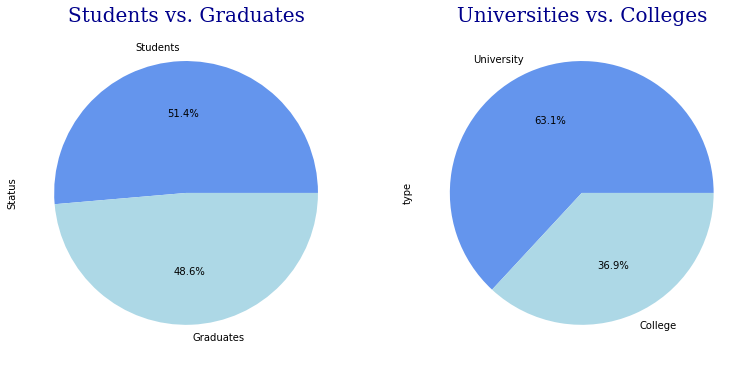

In [58]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Students vs. Graduates",fontdict = font1,size=(20))
industriel_data_df['Status'].value_counts().rename(index={'בוגר/ת':'Graduates','סטודנט/ית':'Students'}).plot.pie(figsize=(13,13),autopct='%1.1f%%',colors = ['cornflowerblue','lightblue'])
plt.subplot(1,2,2)
plt.title("Universities vs. Colleges",fontdict = font1,size=(20))
industriel_data_df['type'].value_counts().rename(index={'אוניברסיטה':'University','מכללה':'College'}).plot.pie(figsize=(13,13),autopct='%1.1f%%',colors = ['cornflowerblue','lightblue'])

plt.show()

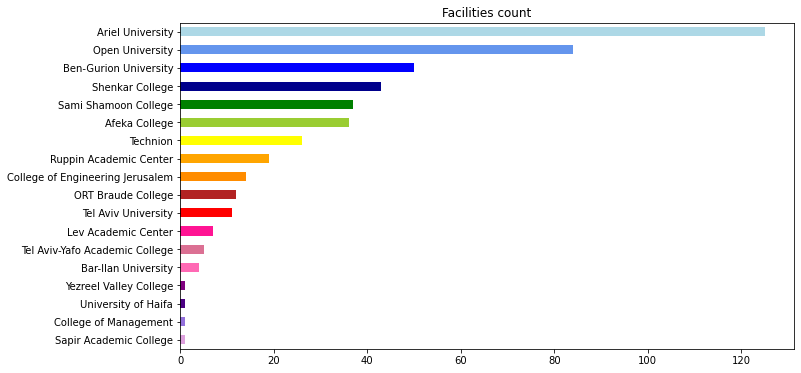

In [59]:
plt.title("Facilities count") 
industriel_data_df["Facility"].value_counts(ascending=True).rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel University','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המרכז האקדמי לב':'Lev Academic Center','המכללה למינהל':'College of Management'}).plot.barh(figsize=(11,6),color=['plum','mediumpurple','indigo','purple','hotpink','palevioletred','deeppink','red','firebrick','darkorange','orange','yellow','yellowgreen','green','darkblue','blue','cornflowerblue','lightblue'])

# <br>
# Digging the data in order to find correlations:

## Specializations Observations:
#### - Specialization preference
#### - Mean Salary For Students Per Speciality

Text(0, 0.5, 'Amount')

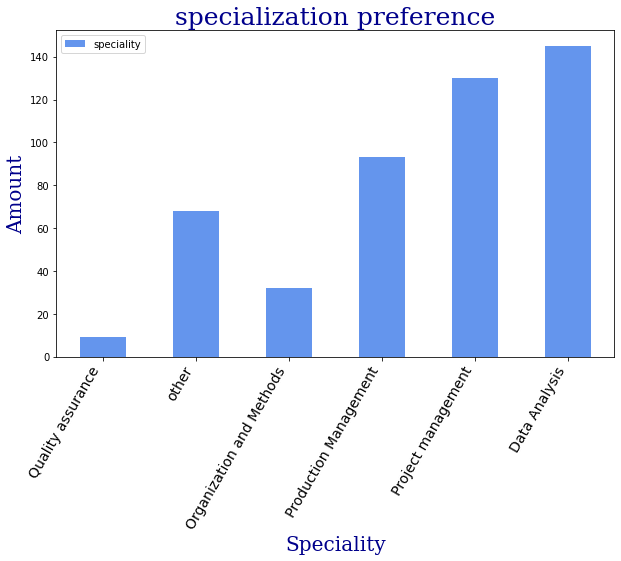

In [60]:
g10=industriel_data_df.groupby("speciality")[['speciality']].count().rename(index={'אבטחת איכות':'Quality assurance','ארגון ושיטות':'Organization and Methods', 'אחר':'other','ניהול היצור':'Production Management','ניהול פרוייקטים':'Project management','ניתוח נתונים':'Data Analysis'}).plot.bar(figsize=(10,6),color=['cornflowerblue'])
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("specialization preference",fontdict = font1)
g10.set_xlabel("Speciality",fontdict = font2,fontsize=20)
g10.set_ylabel("Amount",fontdict = font2,fontsize=20)

Text(0, 0.5, 'Salary')

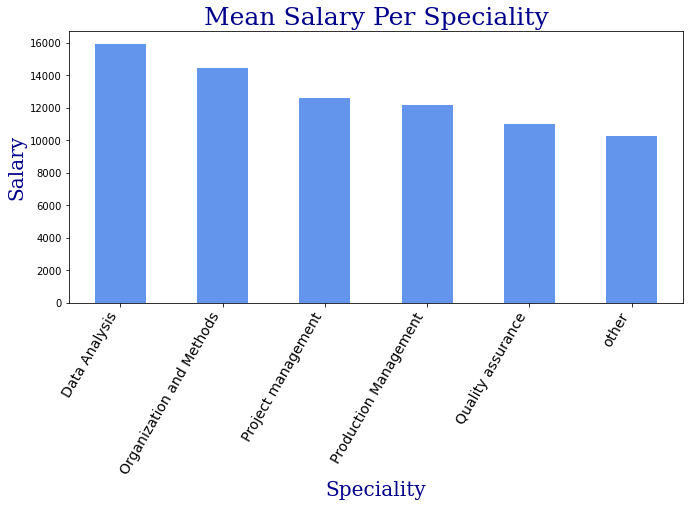

In [327]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]

g11=industriel_data_df_filter.groupby("speciality").Salary.mean().rename(index={'אבטחת איכות':'Quality assurance','אחר':'other','ארגון ושיטות':'Organization and Methods','ניהול היצור':'Production Management','ניהול פרוייקטים':'Project management','ניתוח נתונים':'Data Analysis'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color='cornflowerblue')

plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary Per Speciality",fontdict = font1)
g11.set_xlabel("Speciality",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

In [61]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]


mean = industriel_data_df_filter.Salary.mean()
print("The mean salary for university graduets is " + str(mean))

The mean salary for university graduets is 13334.683720930232


### Observation 1:
### -The specialty that most people choose is Data Analysis, which is also the most rewarding in terms of salary- 20% higher then the mean salary.

<div>
<img src= "https://raw.githubusercontent.com/LianRefaelov/FirstProject/main/dataANA.jpg" width="280"/>
</div>

# <br>
# Salary Observations:
#### - Students salary based on the facility
#### - Graduets salary based on the facility
#### - The connection between facility-salary and experience-salary


### In our salary observations we chose to look at the data filled by 10+ people and we divided the observations between the ones that reflects the students and the ones that reflects the graduates

In [328]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter_graduets = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter_students = industriel_data_df_filter[industriel_data_df_filter.Status == "סטודנט/ית"]

Text(0, 0.5, 'Salary')

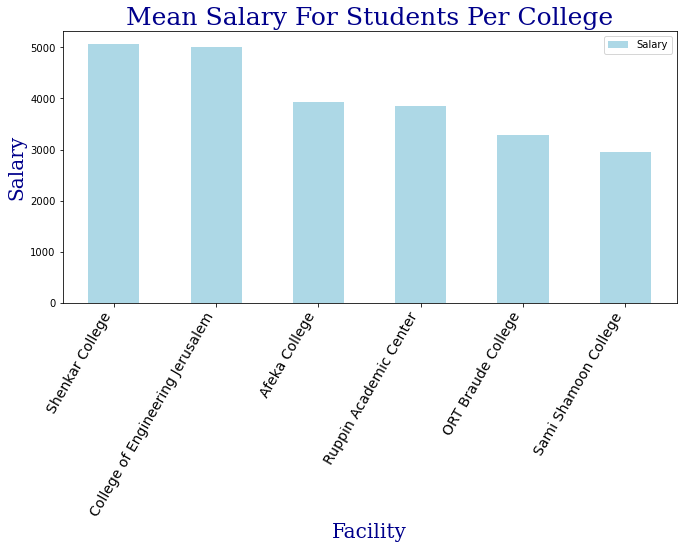

In [329]:
industriel_data_df_filter_students= industriel_data_df_filter_students[industriel_data_df_filter_students.type == "מכללה"]
g11=industriel_data_df_filter_students.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color="lightblue")
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary For Students Per College",fontdict = font1)
g11.set_xlabel("Facility",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

In [330]:
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "סטודנט/ית"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "מכללה"]

mean = industriel_data_df_filter.Salary.mean()
print("The mean salary for colleges students is " + str(mean))

The mean salary for colleges students is 4113.115


Text(0, 0.5, 'Salary')

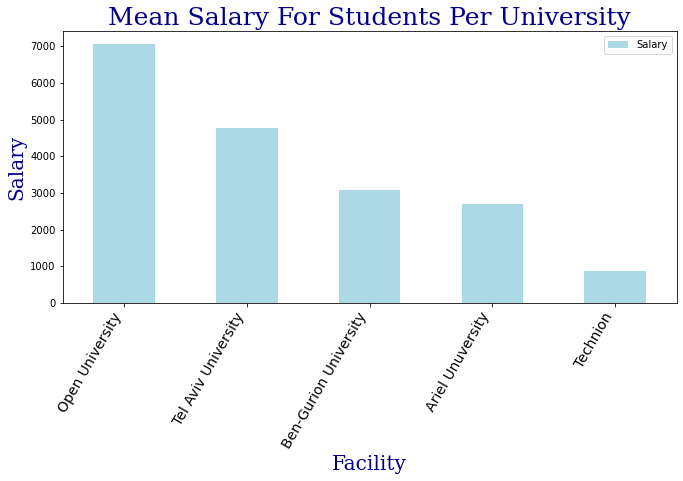

In [331]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "סטודנט/ית"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "אוניברסיטה"]

g11=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color="lightblue")
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary For Students Per University",fontdict = font1)
g11.set_xlabel("Facility",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

In [332]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]

industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "סטודנט/ית"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "אוניברסיטה"]

new_data=industriel_data_df_filter[industriel_data_df_filter.Facility != 'אוניברסיטה פתוחה']
mean = new_data.Salary.mean()
print("The mean salary for university students while ignoring the Open University is " + str(mean))

The mean salary for university students while ignoring the Open University is 2605.57247311828


### The average salary based on our data for college students is 4113 NIS and for university students it stands on 2605 NIS (while ignoring the Open-University that doesn't reflect the salary that students recieve while learning at the university).

Text(0, 0.5, 'Salary')

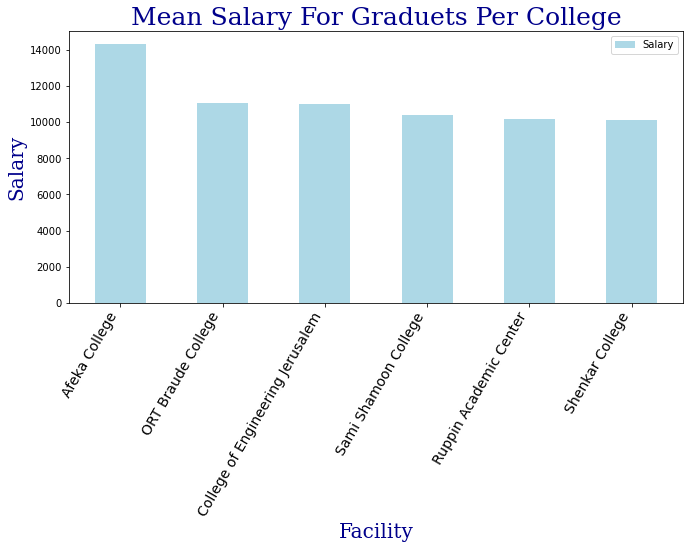

In [333]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "מכללה"]

g11=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color="lightblue")
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary For Graduets Per College",fontdict = font1)
g11.set_xlabel("Facility",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

In [334]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "מכללה"]

mean = industriel_data_df_filter.Salary.mean()
print("The mean salary for college graduets is " + str(mean))

The mean salary for college graduets is 11224.180722891566


Text(0, 0.5, 'Salary')

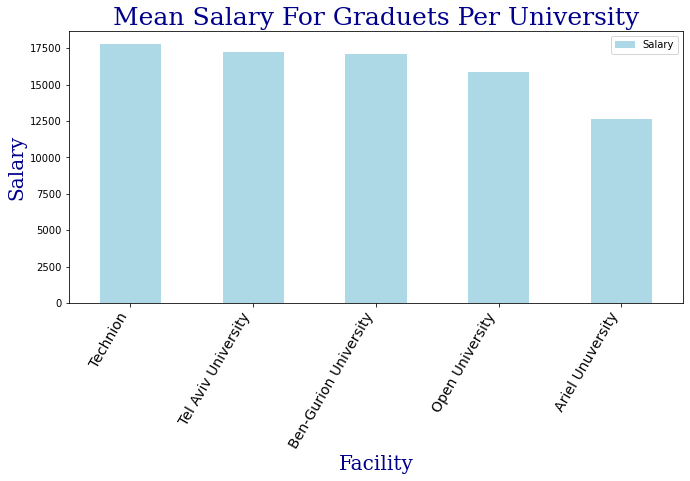

In [335]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "אוניברסיטה"]

g11=industriel_data_df_filter.groupby("Facility").Salary.mean().rename(index={'אוניברסיטה פתוחה':'Open University','אוניברסיטת אריאל':'Ariel Unuversity','אוניברסיטת בן גוריון':'Ben-Gurion University','אוניברסיטת בר אילן':'Bar-Ilan University','אוניברסיטת חיפה':'University of Haifa','אוניברסיטת תל אביב':'Tel Aviv University','האקדמית עמק יזרעאל':'Yezreel Valley College','מכללת שנקר':'Shenkar College','טכניון':'Technion','מכללת ספיר':'Sapir Academic College','מכללת אורט בראודה':'ORT Braude College','מכללת סמי שמעון':'Sami Shamoon College','מכללת רופין':'Ruppin Academic Center','האקדמית עמק יזרעאל':'Yezreel Valley College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College','המכללה להנדסה ירושלים':'College of Engineering Jerusalem','מכללת אפקה':'Afeka College','האקדמית תל אביב יפו':'Tel Aviv-Yafo Academic College'}).sort_values(ascending=False).plot(figsize=(11,5),kind="bar",color="lightblue")
plt.legend()
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary For Graduets Per University",fontdict = font1)
g11.set_xlabel("Facility",fontdict = font2,fontsize=20)
g11.set_ylabel("Salary",fontdict = font2,fontsize=20)

In [336]:
counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.type == "אוניברסיטה"]

mean = industriel_data_df_filter.Salary.mean()
print("The mean salary for college graduets is " + str(mean))

The mean salary for college graduets is 14661.742424242424


### The average salary based on our data for college graduets is 11,224 NIS and for university graduets it stands on 14,661 NIS.

### Observation 2:
### - College students earn on average more than university students
### - University graduates earn on average more than college graduates 
# <br>

Text(0, 0.5, 'Salary')

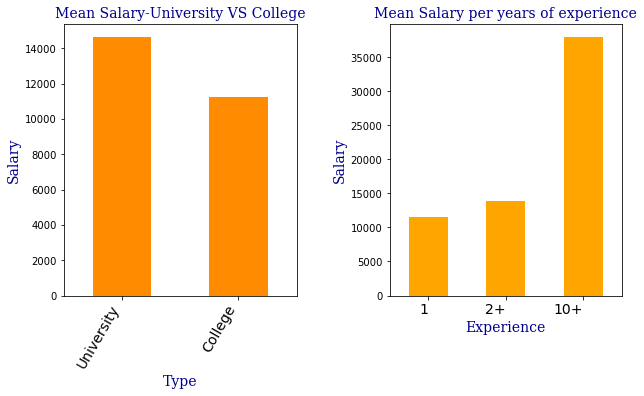

In [337]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.4)

counts = pd.value_counts(industriel_data_df.Facility)
industriel_data_df_filter = industriel_data_df.loc[industriel_data_df.Facility.isin(counts[counts > 10].index), :]
industriel_data_df_filter = industriel_data_df_filter[industriel_data_df_filter.Status == "בוגר/ת"]

plt.subplot(1,2,1)
g19=industriel_data_df_filter.groupby('type').Salary.mean().rename(index={'אוניברסיטה':'University','מכללה':'College'}).plot.bar(color=['darkorange'])
plt.xticks(rotation=60, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary-University VS College",fontdict = font1,fontsize=14)
g19.set_xlabel("Type",fontdict = font2,fontsize=14)
g19.set_ylabel("Salary",fontdict = font2,fontsize=14)

plt.subplot(1,2,2)
g20=industriel_data_df_filter.groupby('Experience').Salary.mean().sort_values(ascending=True).plot.bar(color=['orange'])
plt.xticks(rotation=0, horizontalalignment="right",fontsize=14)
plt.title("Mean Salary per years of experience",fontdict=font1 ,fontsize=14)
g20.set_xlabel("Experience",fontdict = font2,fontsize=14)
g20.set_ylabel("Salary",fontdict = font2,fontsize=14)

### We can see university graduets earn on average more than college graduets and that as the experience rise so does the salary.
# <bd>

### Seeing the affection of the experience and the facility together on the salary:

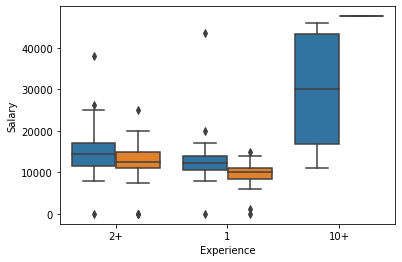

In [338]:
sns.boxplot(x="Experience", y="Salary", hue="type", data=industriel_data_df[industriel_data_df.Status == "בוגר/ת"])
#blue- university, orange- colleges
plt.legend([],[],frameon=False)

In [ ]:
industriel_data_df["Experience"].drop(industriel_data_df.Experience == "10+")


### Observation 3:
### As shown above, the type of facility and the number of experience years both affects the mean salary.
### But combining the affections we get to see that as the years of experience increase, the effect of the facility type decreases. 
# <br>

## To sum up:
### The data provided us with 3 main observations about the Industrial Engineering field-
#### 1. Data Analysis- the specialty that most people choose which is also the most rewarding in terms of salary.
#### 2. College students earn on average more than university students but university graduates earn on average more than college graduates.
#### 3. The more experience an industrial engineer gains- the less impact there is from the type of study facility on his salary.